# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [1029]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import itertools
import random

In [1030]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [1031]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

In [1032]:
def plot_decisions(x, y, **kwargs):
    n_est = len(kwargs)
    n_rows = n_est // 3 + 1
    gs = gridspec.GridSpec(n_rows, 3)
    fig = plt.figure(figsize=(15, 4*n_rows))
    
    coord = itertools.product(range(n_rows), range(3)) 
    for clf, lab, grd in zip(kwargs.values(),
                             kwargs.keys(),
                             itertools.product(range(n_rows), range(3))):
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=x, y=y, clf=clf, legend=2)
        plt.title(lab)
    plt.show()

### Task 1:

As the KNN is non-parametric, it makes no assumption about the data distribution, except for the metric for which the hypothesis of locality is implied. 

KNN also may be considered as a method assuming every data point to be in a potential field of its neighbours, but it mostly doesn't base on the whole data distribution assumptions.


For logistic regression the hypothesis that distribution densities of classes are exponential (e.g. Gaussian) and they have equal variance is implied. If these rather strong assumptions hold then linear classifier is optimal bayesian classifier and distribution densities are estimated by logistic regression [machinelearning.ru](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F).

Thus if we'll construct 2 normally distriuted clouds with equal std (even not linearly separable), Logistic regression is expected to give us result not worse than knn.

In [1049]:
X = []
y = []

centers = np.array([[10, 0], [-10, 0]])
centers_labels = np.array([0,1])

stds = np.arange(10,71,10)
stds = [20,40]
for c, c_y, std in zip(centers, centers_labels, stds):
    X_c, _ = make_blobs(n_samples=300, n_features=2, centers=[c], cluster_std=40)
    X += list(X_c)
    y += 300*[c_y]
    
data = list(zip(X, y))
random.shuffle(data)

X = np.array([x[0] for x in data])
y = np.array([x[1] for x in data])

train_size = int(0.7*2*300)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

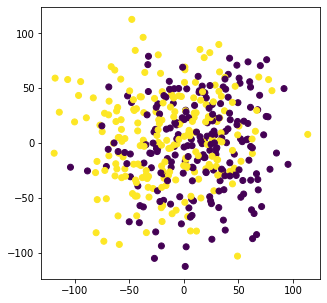

In [1050]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [1051]:
model = GridSearchCV(LogisticRegression(penalty='l2', max_iter=500, solver='saga'), cv=5, param_grid={'C':np.linspace(0.1,1,10)},
                    scoring='accuracy', verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\Eugenii\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [1052]:
model.best_score_

0.6333333333333333

In [1053]:
lr = model.best_estimator_.fit(X_train, y_train)

In [1054]:
accuracy_score(y_train, lr.predict(X_train))

0.6285714285714286

In [1055]:
accuracy_score(y_test, lr.predict(X_test))

0.6055555555555555

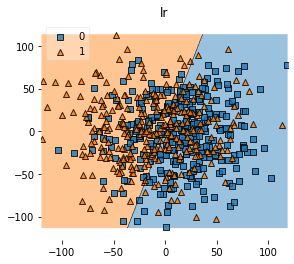

In [1056]:
plot_decisions(X, y, lr=lr)

In [1057]:
model = GridSearchCV(KNeighborsClassifier(p=2), cv=5, param_grid={'n_neighbors':np.arange(1,30)},
                    scoring='accuracy')
model.fit(X_train, y_train)

C:\Users\Eugenii\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [1058]:
model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [1059]:
model.best_score_

0.5976190476190476

In [1060]:
knn = model.best_estimator_.fit(X_train, y_train)

In [1061]:
#accuracy_score(y_train, knn.predict(X_train))

In [1062]:
accuracy_score(y_test, knn.predict(X_test))

0.5444444444444444

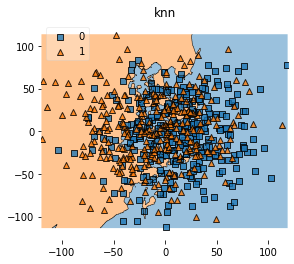

In [1063]:
plot_decisions(X, y, knn=knn)

--------

### Task 2:

Imagining 2 class not separable with any linear kernel is enough to construct dataset on KNN works better. Of course for the following dataset the assumpsion of linear separability doesn't hold.

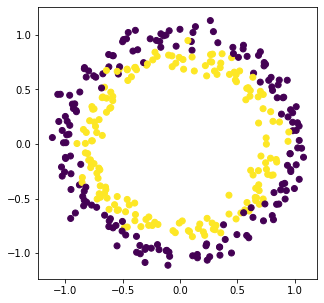

In [1064]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.06, random_state=42)

train_size = int(0.7*500)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

plt.figure(figsize=(5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [1065]:
model = GridSearchCV(LogisticRegression(penalty='l2', max_iter=500, solver='saga'), cv=5, param_grid={'C':np.linspace(0.1,1,10)},
                    scoring='accuracy', verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\Eugenii\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [1066]:
model.best_score_

0.46285714285714286

In [1067]:
lr = model.best_estimator_.fit(X_train, y_train)

In [1068]:
accuracy_score(y_train, lr.predict(X_train))

0.43714285714285717

In [1069]:
accuracy_score(y_test, lr.predict(X_test))

0.44

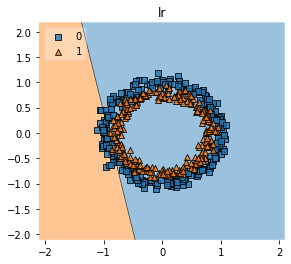

In [1070]:

plot_decisions(X, y, lr=lr)

In [1071]:
model = GridSearchCV(KNeighborsClassifier(p=2), cv=5, param_grid={'n_neighbors':np.arange(1,30)},
                    scoring='accuracy')
model.fit(X_train, y_train)

C:\Users\Eugenii\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [1072]:
model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1073]:
knn = model.best_estimator_.fit(X_train, y_train)

In [1074]:
accuracy_score(y_test, knn.predict(X_test))

0.8733333333333333

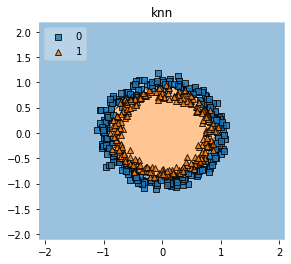

In [1075]:
plot_decisions(X, y, knn=knn)

-----

### Task 3:

Here we can imagine artificial example when cosine distance is much more preferable than euclidian metric for KNN.

Actually using cosine distance is highly depends on preliminary knoledge about data distribution. KNN is likely to use *metrics*, i.e. simmetric non-negative (and $d(x,y) = 0 \Leftrightarrow x = y$) for which the triangle inequality is carried.

Therefore cosine distance can't be considered to be a metric, but we can imagine a special case for wich knn with cosine distance works better.

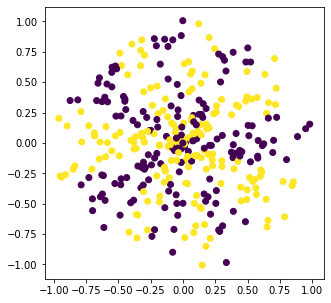

In [1078]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.06, random_state=42, factor=0.99)

y = np.array([x.dot([1,0]) / np.linalg.norm(x, 2) // (np.pi / 10) % 2 == 0 for i, x in enumerate(X)])
X = np.array([(x)  * np.random.rand() for x in X])

train_size = int(0.7*500)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

plt.figure(figsize=(5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

Further we can make the data more noisy and complicated, but still keeping the above structure.

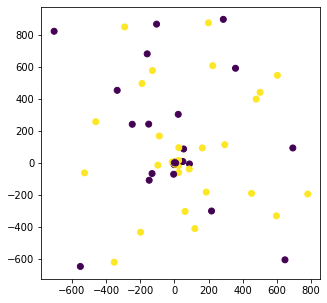

In [1017]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.06, random_state=42, factor=0.99)

y = np.array([x.dot([1,0]) / np.linalg.norm(x, 2) // (np.pi / 10) % 2 == 0 for i, x in enumerate(X)])
X = np.array([(x + 0.2*np.random.rand(2))  * (np.random.rand() * 10) ** (3) for x in X])

train_size = int(0.7*100)

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

plt.figure(figsize=(5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [1018]:
model = GridSearchCV(KNeighborsClassifier(p=2), cv=5, param_grid={'n_neighbors':np.arange(1,30)},
                    scoring='accuracy')
model.fit(X_train, y_train)

C:\Users\Eugenii\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [1019]:
model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [1020]:
knn = model.best_estimator_.fit(X_train, y_train)

In [1021]:
accuracy_score(y_test, knn.predict(X_test))

0.3333333333333333

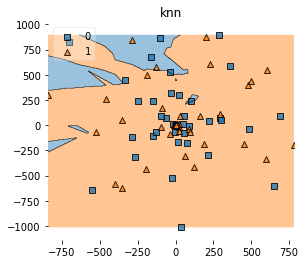

In [1022]:

plot_decisions(X, y.astype(int), knn=knn)

In [1023]:
def cosine_distance(a, b):
    return 1 - a.dot(b) / np.linalg.norm(a, 2) / np.linalg.norm(b, 2)

In [1024]:
model = GridSearchCV(KNeighborsClassifier(metric=cosine_distance), cv=5, param_grid={'n_neighbors':np.arange(1,30)},
                    scoring='accuracy')
model.fit(X_train, y_train)

C:\Users\Eugenii\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric=<function cosine_distance at 0x000000A0277A3BF8>,
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [1025]:
model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30,
                     metric=<function cosine_distance at 0x000000A0277A3BF8>,
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [1026]:
knn = model.best_estimator_.fit(X_train, y_train)

In [1027]:
accuracy_score(y_test, knn.predict(X_test))

0.8333333333333334

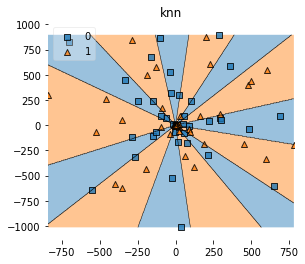

In [1028]:
plot_decisions(X, y.astype(int), knn=knn)